In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))  # (28*28=784)Return the product of array elements over a given axis.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [ ]:
# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3917 - val_loss: 0.3272
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3135 - val_loss: 0.3057
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2976 - val_loss: 0.2947
Epoch 4/50
235/235 [==============================] - 3s 15ms/step - loss: 0.2892 - val_loss: 0.2885
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2843 - val_loss: 0.2847
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2813 - val_loss: 0.2822
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2792 - val_loss: 0.2806
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2777 - val_loss: 0.2792
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2765 - val_loss: 0.2782
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2756 - val_lo

In [ ]:
from matplotlib import pyplot as plt

313/313 [==============================] - 1s 2ms/step
Original Image


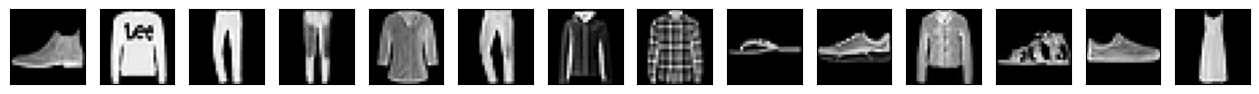

Reconstructed Image


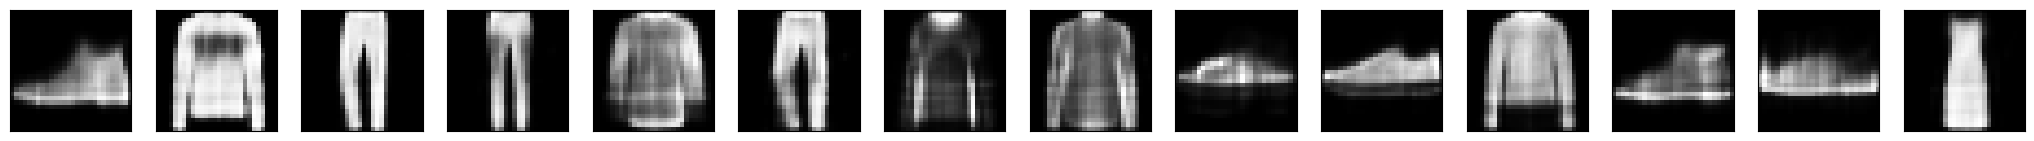

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
n = 14
print('Original Image')
plt.figure(figsize=(64, 16))

for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


print('Reconstructed Image')
plt.figure(figsize=(64, 16))
for i in range(n):
# reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/60
235/235 [==============================] - 7s 22ms/step - loss: 0.0545 - val_loss: 0.0323
Epoch 2/60
235/235 [==============================] - 6s 27ms/step - loss: 0.0269 - val_loss: 0.0237
Epoch 3/60
235/235 [==============================] - 5s 22ms/step - loss: 0.0225 - val_loss: 0.0215
Epoch 4/60
235/235 [==============================] - 6s 26ms/step - loss: 0.0207 - val_loss: 0.0202
Epoch 5/60
235/235 [==============================] - 6s 26ms/step - loss: 0.0196 - val_loss: 0.0194
Epoch 6/60
235/235 [==============================] - 6s 28ms/step - loss: 0.0185 - val_loss: 0.0180
Epoch 7/60
235/235 [==============================] - 5s 23ms/step - loss: 0.0176 - val_loss: 0.0174
Epoch 8/60
235/235 [==============================] - 6s 28ms/step - loss: 0.0170 - val_loss: 0.0168
Epoch 9/60
235/235 [==============================] - 5s 22ms/step - loss: 0.0164 - val_loss: 0.0163
Epoch 10/60
235/235 [==============================] - 5s 23ms/step - loss: 0.0160 - val_lo

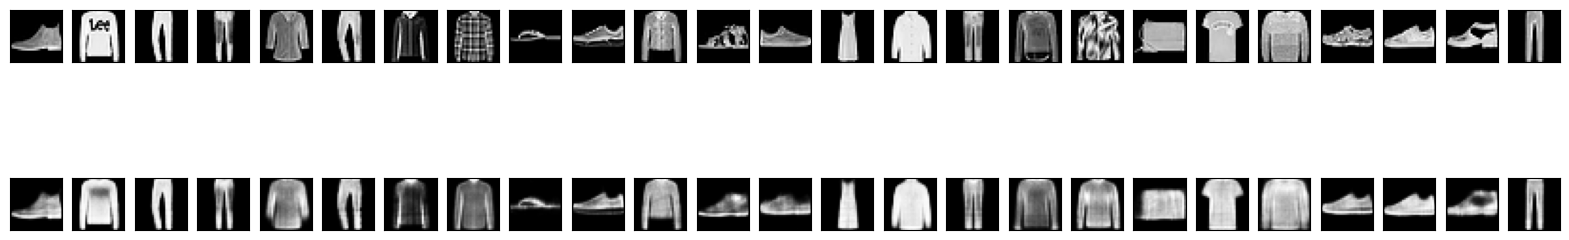

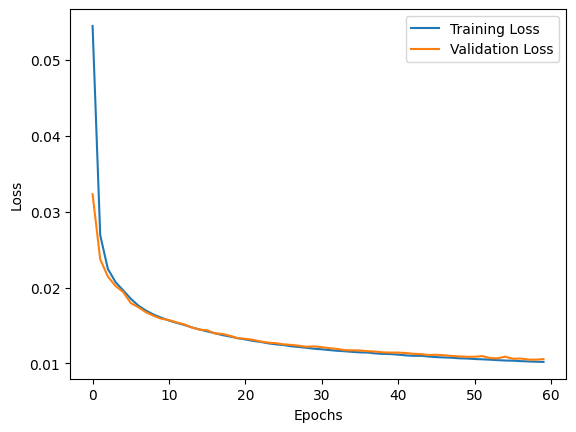

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
input_size = 784
code_size = 128

input_img = Input(shape=(input_size,))

hidden_1 = Dense(256, activation='relu')(input_img)
hidden_2 = Dense(128, activation='relu')(hidden_1)
hidden_3 = Dense(64, activation='relu')(hidden_2)

code = Dense(code_size, activation='sigmoid')(hidden_3)

hidden_4 = Dense(64, activation='relu')(code)
hidden_5 = Dense(128, activation='relu')(hidden_4)
hidden_6 = Dense(256, activation='relu')(hidden_5)

output_img = Dense(input_size, activation='sigmoid')(hidden_6)

autoencoder = Model(input_img, output_img)

autoencoder.compile(optimizer='adam', loss='MSE')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=60,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Generate reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 25
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
